# アメリカ大統領選挙2017
# Trump vs Clinton

In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [6]:
%matplotlib inline

In [7]:
import requests
from io import StringIO

In [8]:
url='http://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

In [9]:
source =requests.get(url).text

In [10]:
poll_data = StringIO(source)

In [11]:
poll_df =pd.read_csv(poll_data)

In [12]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


In [13]:
poll_df.head()

#いろんな調査機関が調査してどちらが勝つか予想

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [14]:
poll_df[['Pollster','Partisan','Affiliation']].sort('Pollster').drop_duplicates()

#調査対象自体に政党色があるか？
#Rep:共和党　Dem:民主党

/Users/waka/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Pollster,Partisan,Affiliation
107,ABC News,Nonpartisan,None
680,ABC/Post,Nonpartisan,None
859,AP-GfK (web),Nonpartisan,None
152,ARG,Nonpartisan,None
50,Angus Reid/MARU-Matchbox,Nonpartisan,None
14,Bloomberg/Selzer,Nonpartisan,None
737,CBS,Nonpartisan,None
454,CBS/Times,Nonpartisan,None
1021,CNBC,Nonpartisan,None
781,CNN,Nonpartisan,None


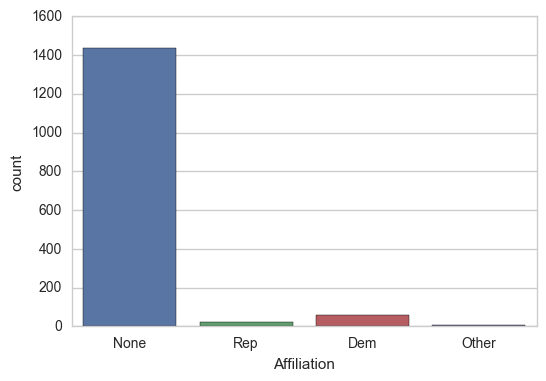

In [15]:
sns.countplot('Affiliation',data=poll_df)

#ほとんどがどちらの政党にもよらない調査

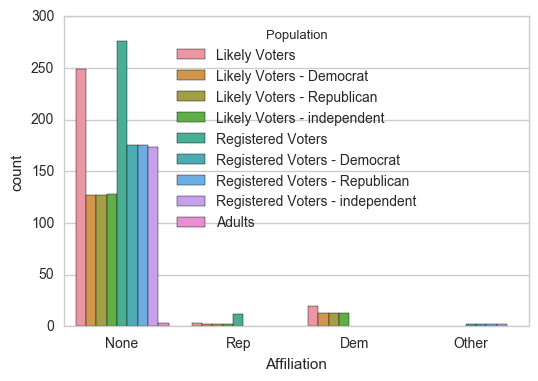

In [16]:
sns.countplot('Affiliation',data=poll_df,hue='Population',)

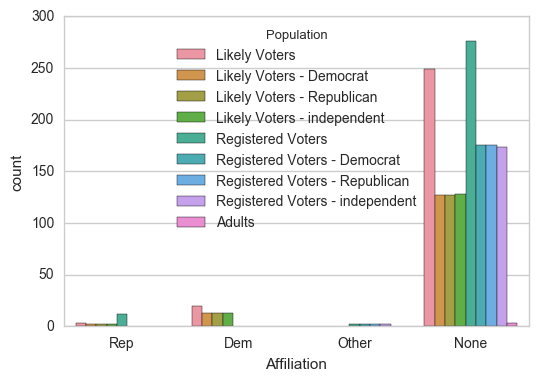

In [17]:
sns.countplot('Affiliation',data=poll_df,hue='Population', order=['Rep','Dem','Other','None'])

In [18]:
avg = pd.DataFrame(poll_df.mean())

#数値データの平均

In [19]:
avg

,0
Number of Observations,1916.022705
Trump,40.643890
Clinton,42.733903
Other,5.806011
Undecided,9.315068
Question Iteration,1.216820


In [20]:
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)

In [21]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Question Iteration',axis=0,inplace=True)

In [22]:
std

,0
Trump,23.566390
Clinton,25.298731
Other,5.009533
Undecided,6.253118


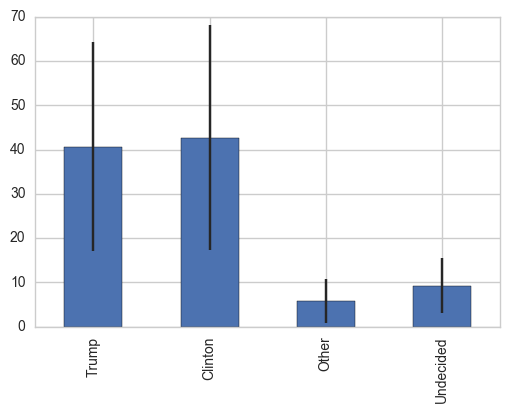

In [23]:
avg.plot(yerr=std,kind='bar',legend=False)

In [24]:
poll_avg =pd.concat([avg,std],axis=1)
poll_avg.columns=['Average','STD']

In [25]:
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Other,5.806011,5.009533
Undecided,9.315068,6.253118


In [26]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


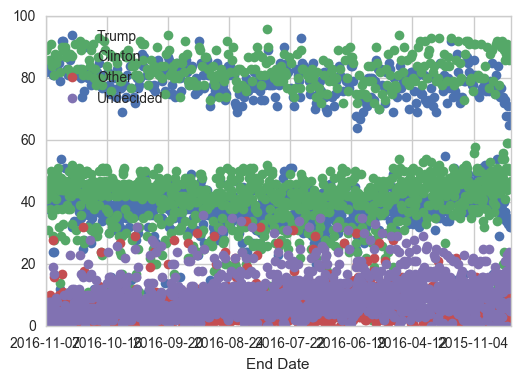

In [27]:
poll_df.plot(x='End Date',y=['Trump','Clinton','Other','Undecided'],marker='o',linestyle='')

In [28]:
from datetime import datetime

In [29]:
poll_df['Difference']=(poll_df.Trump - poll_df.Clinton)/100

#プラスだったらトランプリード、マイナスだったらクリントンリード

In [30]:
poll_df

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02
5,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,3669.0,Likely Voters,Internet,41.0,45.0,5.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1,-0.04
6,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1392.0,Likely Voters - Democrat,Internet,6.0,90.0,2.0,2.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1,-0.84
7,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1110.0,Likely Voters - Republican,Internet,84.0,4.0,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1,0.80
8,YouGov/Economist,2016-11-04,2016-11-07,2016-11-07T21:25:46Z,1167.0,Likely Voters - independent,Internet,44.0,31.0,9.0,8.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/11/07/final...,Nonpartisan,None,NaN,1,0.13
9,Lucid/The Times-Picayune,2016-11-04,2016-11-06,2016-11-07T15:43:26Z,931.0,Likely Voters,Internet,40.0,45.0,2.0,7.0,http://elections.huffingtonpost.com/pollster/p...,https://luc.id/2016-presidential-tracker/,Nonpartisan,None,NaN,1,-0.05


In [31]:
poll_df =poll_df.groupby(['Start Date'],as_index=False).mean()

In [32]:
poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


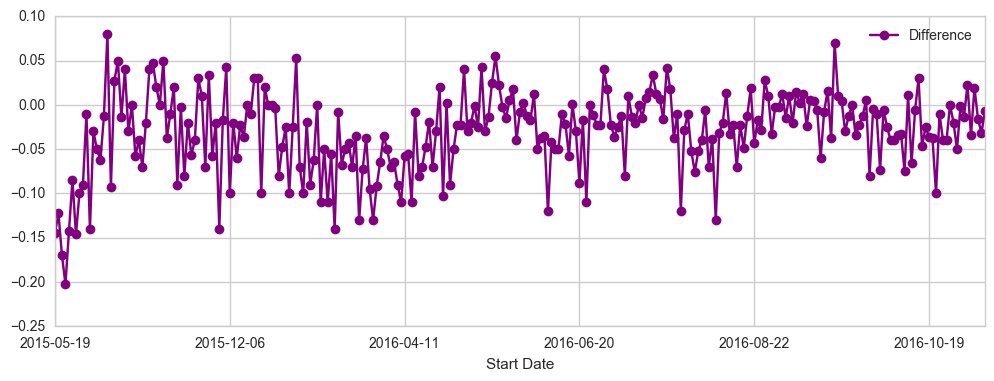

In [33]:
fig=poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

#時系列データをみてもおおむねクリントンがリード？？

In [34]:
#10/4 10/9 10/19 討論会の日

In [35]:
poll_df[poll_df['Start Date'].apply(lambda x:x.startswith('2016-10'))]

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
232,2016-10-01,527.500000,42.250000,41.750000,4.750000,6.750000,1.000000,0.005000
233,2016-10-02,451.000000,37.000000,45.000000,3.000000,9.000000,1.000000,-0.080000
234,2016-10-03,12226.000000,42.900000,43.400000,4.333333,4.222222,1.100000,-0.005000
235,2016-10-04,1500.000000,42.000000,43.000000,4.000000,4.000000,1.000000,-0.010000
236,2016-10-05,827.666667,39.333333,46.666667,3.500000,5.000000,1.000000,-0.073333
237,2016-10-06,2363.000000,39.000000,39.545455,8.818182,7.727273,1.363636,-0.005455
238,2016-10-07,567.500000,40.000000,42.500000,3.750000,8.500000,1.000000,-0.025000
239,2016-10-08,623.307692,39.230769,43.230769,2.666667,9.846154,1.307692,-0.040000
240,2016-10-09,1500.000000,39.000000,43.000000,6.000000,5.000000,1.000000,-0.040000
241,2016-10-10,4098.266667,40.047619,43.476190,4.312500,8.050000,1.238095,-0.034286


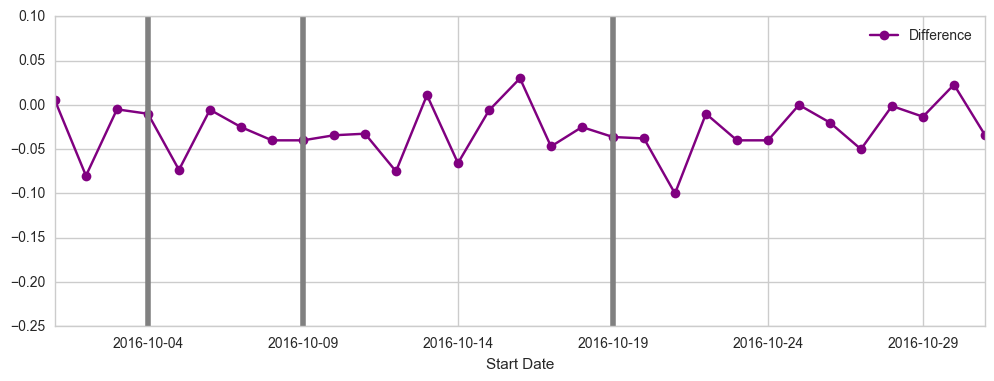

In [36]:
fig=poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple', xlim=(232,262))
plt.axvline(x=235, linewidth=4, color='gray')
plt.axvline(x=240, linewidth=4, color='gray')
plt.axvline(x=250, linewidth=4, color='gray')

#討論会のあとにはトランプの支持率が下がりやすい